In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import load_data_local
import statsmodels.api as sm

## Set preferences

In [ ]:
SH = ['B3', 'B4', 'B5', 'B6']
RASA2 = ['E3', 'E4', 'E5', 'E6']
CUL5 = ['B7', 'B8', 'B9', 'B10']

In [3]:
conditions = ['Safe Harbor KO', 'RASA2 KO', 'CUL5 KO']

In [4]:
colors = {'Safe Harbor KO': '#a9a9a9', 
          'RASA2 KO': '#800000',
          'CUL5 KO': '#000075'}


In [5]:
data_dir = '/gladstone/engelhardt/lab/MarsonLabIncucyteData/AnalysisFiles/CarnevaleRepStim/updated_full'

## Get cell counts from segmentation

In [6]:
n_cells = np.zeros((3,4,350))

In [7]:
def get_cells_over_time(dcl_ob):
    tcells = dcl_ob['y'][0,:,:,0,:]
    ncells = [len(np.unique(tcells[i])) - 1 for i in range(len(tcells))]
    return ncells

In [8]:
for i in range(4):
    sh_ob = load_data_local(data_dir + '/cart_' + SH[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    n_cells[0,i] = get_cells_over_time(sh_ob)
    
    rasa_ob = load_data_local(data_dir + '/cart_' + RASA2[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    n_cells[1,i] = get_cells_over_time(rasa_ob)

    cul_ob = load_data_local(data_dir + '/cart_' + CUL5[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    n_cells[2,i] = get_cells_over_time(cul_ob)

In [9]:
lower_lim = 50
upper_lim = 350

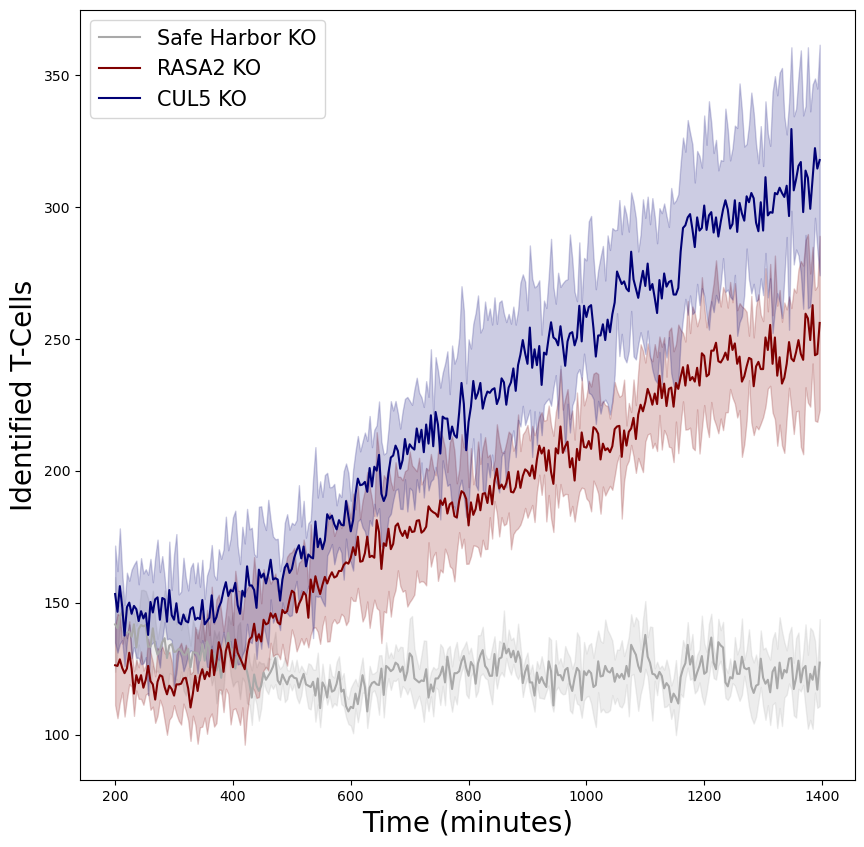

In [10]:
fig, ax = plt.subplots(1,1,figsize = (10,10))
for i in range(len(conditions)):
    ax.plot(4 * np.arange(lower_lim, upper_lim), 
             np.mean(n_cells[i], axis = 0)[lower_lim:upper_lim], '-', color = colors[conditions[i]], label = conditions[i])
    ax.fill_between(4 * np.arange(lower_lim, upper_lim), 
                    np.mean(n_cells[i], axis = 0)[lower_lim:upper_lim] -  1.96 * np.std(n_cells[i], axis = 0)[lower_lim:upper_lim]/2,
                    np.mean(n_cells[i], axis = 0)[lower_lim:upper_lim] + 1.96 * np.std(n_cells[i], axis = 0)[lower_lim:upper_lim]/2,
                    color = colors[conditions[i]], alpha = 0.2)
plt.legend(fontsize = 15)
plt.xlabel('Time (minutes)', fontsize = 20)
plt.ylabel('Identified T-Cells', fontsize = 20)
#plt.xlim([50 * 3, 350 * 3])
plt.show()

## Fit exponential growth models

In [11]:
SH_y = n_cells[0,:,lower_lim:upper_lim] # - n_cells[0,:,[lower_lim]].swapaxes(0,1)
RASA_y = n_cells[1,:,lower_lim:upper_lim] # - n_cells[1,:,[lower_lim]].swapaxes(0,1)
CUL_y = n_cells[2,:,lower_lim:upper_lim] # - n_cells[2,:,[lower_lim]].swapaxes(0,1)

In [12]:
t = np.repeat(4 * np.expand_dims(np.arange(upper_lim - lower_lim), axis = 1), 4 , axis = 1).T

### SH

In [13]:
sh_mod = sm.OLS(np.log(SH_y.reshape(-1)), sm.add_constant(t.reshape(-1)))
sh_res = sh_mod.fit()
print(sh_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     35.30
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           3.71e-09
Time:                        10:16:03   Log-Likelihood:                 1163.4
No. Observations:                1200   AIC:                            -2323.
Df Residuals:                    1198   BIC:                            -2313.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8479      0.005    916.487      0.0

### RASA2

In [14]:
rasa_mod = sm.OLS(np.log(RASA_y.reshape(-1)), sm.add_constant(t.reshape(-1)))
rasa_res = rasa_mod.fit()
print(rasa_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     4553.
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:16:03   Log-Likelihood:                 821.50
No. Observations:                1200   AIC:                            -1639.
Df Residuals:                    1198   BIC:                            -1629.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7786      0.007    679.407      0.0

### CUL5

In [15]:
cul_mod = sm.OLS(np.log(CUL_y.reshape(-1)), sm.add_constant(t.reshape(-1)))
cul_res = cul_mod.fit()
print(cul_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     5463.
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:16:03   Log-Likelihood:                 836.94
No. Observations:                1200   AIC:                            -1670.
Df Residuals:                    1198   BIC:                            -1660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9201      0.007    708.581      0.0

## Combine each pair of conditions to compare slopes with interaction test

### SH/RASA

In [16]:
sh_rasa_y = np.concatenate((SH_y.reshape(-1), RASA_y.reshape(-1)))
sh_rasa_x = np.concatenate([t.reshape(-1), t.reshape(-1)])
sh_rasa_group = np.concatenate((np.zeros(t.reshape(-1).shape), np.ones(t.reshape(-1).shape)))
sh_rasa_int = np.multiply(sh_rasa_x, sh_rasa_group)
X = np.vstack((sh_rasa_x, sh_rasa_group, sh_rasa_int, np.ones((sh_rasa_int.shape)))).T
sh_rasa_mod = sm.OLS(sh_rasa_y, X)
sh_rasa_res = sh_rasa_mod.fit()
print(sh_rasa_res.summary())
print(sh_rasa_res.pvalues)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     5111.
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:16:03   Log-Likelihood:                -10185.
No. Observations:                2400   AIC:                         2.038e+04
Df Residuals:                    2396   BIC:                         2.040e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0058      0.001     -4.108      0.0

### SH/CUL

In [17]:
sh_cul_y = np.concatenate((SH_y.reshape(-1), CUL_y.reshape(-1)))
sh_cul_x = np.concatenate([t.reshape(-1), t.reshape(-1)])
sh_cul_group = np.concatenate((np.zeros(t.reshape(-1).shape), np.ones(t.reshape(-1).shape)))
sh_cul_int = np.multiply(sh_cul_x, sh_cul_group)
X = np.vstack((sh_cul_x, sh_cul_group, sh_cul_int, np.ones((sh_cul_int.shape)))).T
sh_cul_mod = sm.OLS(sh_cul_y, X)
sh_cul_res = sh_cul_mod.fit()
print(sh_cul_res.summary())
print(sh_cul_res.pvalues)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     7454.
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:16:03   Log-Likelihood:                -10653.
No. Observations:                2400   AIC:                         2.131e+04
Df Residuals:                    2396   BIC:                         2.134e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0058      0.002     -3.380      0.0

### RASA/CUL

In [18]:
rasa_cul_y = np.concatenate((RASA_y.reshape(-1), CUL_y.reshape(-1)))
rasa_cul_x = np.concatenate([t.reshape(-1), t.reshape(-1)])
rasa_cul_group = np.concatenate((np.zeros(t.reshape(-1).shape), np.ones(t.reshape(-1).shape)))
rasa_cul_int = np.multiply(rasa_cul_x, rasa_cul_group)
X = np.vstack((rasa_cul_x, rasa_cul_group, rasa_cul_int, np.ones((rasa_cul_int.shape)))).T
rasa_cul_mod = sm.OLS(rasa_cul_y, X)
rasa_cul_res = rasa_cul_mod.fit()
print(rasa_cul_res.summary())
print(rasa_cul_res.pvalues)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     3850.
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:16:03   Log-Likelihood:                -11023.
No. Observations:                2400   AIC:                         2.205e+04
Df Residuals:                    2396   BIC:                         2.208e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1215      0.002     60.962      0.0